In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

from haversine import haversine

In [26]:
plt.rcParams['font.family'] = 'Malgun Gothic'
print(plt.rcParams['font.family'])

['Malgun Gothic']


In [4]:
nowonSub = pd.read_excel('C:/Users/1102j/anaconda/dataScience/project/지하철/노원구_지하철.xlsx')
nowonSub

,역번호,역사명,노선번호,노선명,환승역구분,역위도,역경도,역사도로명주소,호선
0,2645,석계,S1106,서울 도시철도 6호선,환승역,37.614983,127.065561,서울특별시 노원구 화랑로 지하347-1 (월계동),6
1,2646,태릉입구,S1106,서울 도시철도 6호선,환승역,37.617965,127.074894,서울특별시 노원구 동일로 지하992-1 (공릉동),6
2,2647,화랑대,S1106,서울 도시철도 6호선,일반역,37.620131,127.084426,서울특별시 노원구 화랑로 지하510,6
3,2713,수락산,S1107,서울 도시철도 7호선,일반역,37.677916,127.055234,서울특별시 노원구 동일로 지하1662 (상계동),7
4,2714,마들,S1107,서울 도시철도 7호선,일반역,37.665162,127.057334,서울특별시 노원구 동일로 지하1530-1 (상계동),7
5,2715,노원,S1107,서울 도시철도 7호선,환승역,37.654960,127.062005,서울특별시 노원구 상계로 69-1 (상계동),7
6,409,당고개,S1104,서울 도시철도 4호선,일반역,37.670326,127.078956,서울특별시 노원구 상계로 305 (상계동),4
7,410,상계,S1104,서울 도시철도 4호선,일반역,37.660905,127.073129,서울특별시 노원구 상계로 182 (상계동),4
8,411,노원,S1104,서울 도시철도 4호선,환승역,37.655149,127.062495,서울특별시 노원구 상계로 69-1 (상계동),4
9,2716,중계,S1107,서울 도시철도 7호선,일반역,37.645217,127.064083,서울특별시 노원구 동일로 지하1308-1 (중계동),7


In [5]:
price = pd.read_excel('C:/Users/1102j/anaconda/dataScience/project/아파트_위치_전월세/아파트(전월세)_with_위도경도.xlsx')
price.head()

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도
0,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,202002,5,"53,000",0,8,1988,언주로 103,37.481344,127.052912
1,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),월세,77.75,202003,13,"30,000",75,1,1988,언주로 103,37.481344,127.052912
2,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,202005,28,"61,500",0,5,1988,언주로 103,37.481344,127.052912
3,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,202006,16,"130,000",0,7,1988,언주로 103,37.481344,127.052912
4,서울특별시 강남구 개포동,655-2,655.0,2.0,개포2차현대아파트(220),전세,77.75,202006,17,"65,000",0,7,1988,언주로 103,37.481344,127.052912


# 아파트(전월세)_with_위도경도 preprocessing

In [6]:
nowonPrice = price[price['시군구'].str.contains('노원구')]
nowonPrice

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도
59957,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202001,6,"1,000",65,4,2019,화랑로 425-7,37.617803,127.074563
59958,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202007,9,"1,000",65,5,2019,화랑로 425-7,37.617803,127.074563
59959,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202008,6,"1,000",65,10,2019,화랑로 425-7,37.617803,127.074563
59960,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202008,21,"13,000",10,8,2019,화랑로 425-7,37.617803,127.074563
59961,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202009,7,"2,000",60,8,2019,화랑로 425-7,37.617803,127.074563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74732,서울특별시 노원구 하계동,270,270.0,0.0,현대,월세,84.95,202011,23,"17,000",75,14,1988,섬밭로 232,37.636615,127.065668
74733,서울특별시 노원구 하계동,270,270.0,0.0,현대,전세,84.95,202012,2,"65,000",0,8,1988,섬밭로 232,37.636615,127.065668
74734,서울특별시 노원구 하계동,270,270.0,0.0,현대,전세,84.95,202012,9,"37,800",0,2,1988,섬밭로 232,37.636615,127.065668
74735,서울특별시 노원구 하계동,270,270.0,0.0,현대,전세,71.68,202012,22,"45,000",0,3,1988,섬밭로 232,37.636615,127.065668


In [7]:
nowonPrice.shape

(14780, 16)

In [8]:
nowonPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14780 entries, 59957 to 74736
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구      14780 non-null  object 
 1   번지       14780 non-null  object 
 2   본번       14780 non-null  float64
 3   부번       14780 non-null  float64
 4   단지명      14780 non-null  object 
 5   전월세구분    14780 non-null  object 
 6   전용면적(㎡)  14780 non-null  float64
 7   계약년월     14780 non-null  int64  
 8   계약일      14780 non-null  int64  
 9   보증금(만원)  14780 non-null  object 
 10  월세(만원)   14780 non-null  object 
 11  층        14780 non-null  int64  
 12  건축년도     14780 non-null  int64  
 13  도로명      14780 non-null  object 
 14  위도       14540 non-null  float64
 15  경도       14540 non-null  float64
dtypes: float64(5), int64(4), object(7)
memory usage: 1.9+ MB


In [9]:
nowonPrice.isnull().sum()

시군구          0
번지           0
본번           0
부번           0
단지명          0
전월세구분        0
전용면적(㎡)      0
계약년월         0
계약일          0
보증금(만원)      0
월세(만원)       0
층            0
건축년도         0
도로명          0
위도         240
경도         240
dtype: int64

In [10]:
nowonPrice = nowonPrice.dropna()

In [11]:
nowonPrice.shape

(14540, 16)

In [12]:
nowonPrice.head(3)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도
59957,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202001,6,"1,000",65,4,2019,화랑로 425-7,37.617803,127.074563
59958,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202007,9,"1,000",65,5,2019,화랑로 425-7,37.617803,127.074563
59959,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202008,6,"1,000",65,10,2019,화랑로 425-7,37.617803,127.074563


# Distace Calculation using Latitude and Longitude

1. 역과 아파트 간 위경도 값을 구한다

2. 두 위경도 값으로 모든 역간 거리를 구한다

3. 역간 거리 중 가장 가까운 값을 선택한다

In [12]:
price_plc = nowonPrice.loc[:, '위도':'경도']
price_plc

,위도,경도
59957,37.617803,127.074563
59958,37.617803,127.074563
59959,37.617803,127.074563
59960,37.617803,127.074563
59961,37.617803,127.074563
...,...,...
74732,37.636615,127.065668
74733,37.636615,127.065668
74734,37.636615,127.065668
74735,37.636615,127.065668


In [13]:
sub_plc = nowonSub.loc[:, '역위도':'역경도']
sub_plc

,역위도,역경도
0,37.614983,127.065561
1,37.617965,127.074894
2,37.620131,127.084426
3,37.677916,127.055234
4,37.665162,127.057334
5,37.654960,127.062005
6,37.670326,127.078956
7,37.660905,127.073129
8,37.655149,127.062495
9,37.645217,127.064083


In [15]:
sub_name = nowonSub.loc[:, '역사명']
sub_name

0       석계
1     태릉입구
2      화랑대
3      수락산
4       마들
5       노원
6      당고개
7       상계
8       노원
9       중계
10      하계
11      공릉
12    태릉입구
Name: 역사명, dtype: object

In [17]:
sub_lat = list(np.array(sub_plc['역위도'].tolist()))
sub_long = list(np.array(sub_plc['역경도'].tolist()))

price_lat = list(np.array(price_plc['위도'].tolist()))
price_long = list(np.array(price_plc['경도'].tolist()))

In [18]:
dist = []

for i in range(len(price_plc)):
    buf_dist = []
    buf_p = []
    
    buf_p.append(price_lat[i])
    buf_p.append(price_long[i])
    
    for j in range(len(sub_plc)):
        buf_s = []
        
        buf_s.append(sub_lat[j])
        buf_s.append(sub_long[j])
        
        buf_dist.append(haversine(buf_p, buf_s))
        
    dist.append(buf_dist)

In [19]:
pd.DataFrame(dist)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.852598,0.034287,0.906485,6.897451,5.480289,4.277137,5.853075,4.794405,4.286547,3.18494,2.154477,0.870929,0.041920
1,0.852598,0.034287,0.906485,6.897451,5.480289,4.277137,5.853075,4.794405,4.286547,3.18494,2.154477,0.870929,0.041920
2,0.852598,0.034287,0.906485,6.897451,5.480289,4.277137,5.853075,4.794405,4.286547,3.18494,2.154477,0.870929,0.041920
3,0.852598,0.034287,0.906485,6.897451,5.480289,4.277137,5.853075,4.794405,4.286547,3.18494,2.154477,0.870929,0.041920
4,0.852598,0.034287,0.906485,6.897451,5.480289,4.277137,5.853075,4.794405,4.286547,3.18494,2.154477,0.870929,0.041920
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14535,2.405383,2.227244,2.467554,4.683350,3.258005,2.065230,3.926728,2.779627,2.079757,0.96660,0.190189,1.386002,2.200127
14536,2.405383,2.227244,2.467554,4.683350,3.258005,2.065230,3.926728,2.779627,2.079757,0.96660,0.190189,1.386002,2.200127
14537,2.405383,2.227244,2.467554,4.683350,3.258005,2.065230,3.926728,2.779627,2.079757,0.96660,0.190189,1.386002,2.200127
14538,2.405383,2.227244,2.467554,4.683350,3.258005,2.065230,3.926728,2.779627,2.079757,0.96660,0.190189,1.386002,2.200127


In [62]:
min_dist = []
min_index = []

for i in range(len(dist)):
    buf = dist[i]
    min_dist.append(min(buf))
    min_index.append(buf.index(min(buf)))

In [63]:
pd.DataFrame(min_dist)

,0
0,0.034287
1,0.034287
2,0.034287
3,0.034287
4,0.034287
...,...
14535,0.190189
14536,0.190189
14537,0.190189
14538,0.190189


In [64]:
pd.DataFrame(min_index)

,0
0,1
1,1
2,1
3,1
4,1
...,...
14535,10
14536,10
14537,10
14538,10


In [65]:
for i in range(len(min_index)):
    min_index[i] = sub_name[min_index[i]]
    
pd.DataFrame(min_index)

,0
0,태릉입구
1,태릉입구
2,태릉입구
3,태릉입구
4,태릉입구
...,...
14535,하계
14536,하계
14537,하계
14538,하계


In [69]:
name_array = np.array(min_index)
name_array

array(['태릉입구', '태릉입구', '태릉입구', ..., '하계', '하계', '하계'], dtype='<U4')

In [66]:
dist_array = np.array(min_dist)
dist_array

array([0.03428711, 0.03428711, 0.03428711, ..., 0.19018899, 0.19018899,
       0.19018899])

In [67]:
dist_array = dist_array * 1000
dist_array

array([ 34.28711265,  34.28711265,  34.28711265, ..., 190.18899043,
       190.18899043, 190.18899043])

In [68]:
nowonPrice.shape

(14540, 17)

In [55]:
nowonPrice['역거리(m)'] = dist_array
nowonPrice.head(10)

<ipython-input-55-c2e485e797a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nowonPrice['역거리(m)'] = dist_array
<ipython-input-55-c2e485e797a5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nowonPrice['역이름'] = df_index


,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
59957,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202001,6,"1,000",65,4,2019,화랑로 425-7,37.617803,127.074563,34.287113,NaN
59958,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202007,9,"1,000",65,5,2019,화랑로 425-7,37.617803,127.074563,34.287113,NaN
59959,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202008,6,"1,000",65,10,2019,화랑로 425-7,37.617803,127.074563,34.287113,NaN
59960,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202008,21,"13,000",10,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,NaN
59961,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202009,7,"2,000",60,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,NaN
59962,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202009,7,"2,000",60,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,NaN
59963,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202012,2,"2,000",60,4,2019,화랑로 425-7,37.617803,127.074563,34.287113,NaN
59964,서울특별시 노원구 공릉동,670-7,670.0,7.0,6.7디벨리움,월세,17.27,202001,22,"1,000",62,8,2016,화랑로 443,37.618280,127.076585,153.038912,NaN
59965,서울특별시 노원구 공릉동,670-7,670.0,7.0,6.7디벨리움,월세,28.91,202002,6,"2,000",80,17,2016,화랑로 443,37.618280,127.076585,153.038912,NaN
59966,서울특별시 노원구 공릉동,670-7,670.0,7.0,6.7디벨리움,월세,17.27,202002,21,"1,000",65,8,2016,화랑로 443,37.618280,127.076585,153.038912,NaN


In [70]:
nowonPrice['역이름'] = name_array
nowonPrice.head(5)

<ipython-input-70-cadbde2d30b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nowonPrice['역이름'] = name_array


,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
59957,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202001,6,"1,000",65,4,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
59958,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202007,9,"1,000",65,5,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
59959,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202008,6,"1,000",65,10,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
59960,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202008,21,"13,000",10,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
59961,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202009,7,"2,000",60,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구


In [71]:
nowonPrice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14540 entries, 59957 to 74736
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구      14540 non-null  object 
 1   번지       14540 non-null  object 
 2   본번       14540 non-null  float64
 3   부번       14540 non-null  float64
 4   단지명      14540 non-null  object 
 5   전월세구분    14540 non-null  object 
 6   전용면적(㎡)  14540 non-null  float64
 7   계약년월     14540 non-null  int64  
 8   계약일      14540 non-null  int64  
 9   보증금(만원)  14540 non-null  object 
 10  월세(만원)   14540 non-null  object 
 11  층        14540 non-null  int64  
 12  건축년도     14540 non-null  int64  
 13  도로명      14540 non-null  object 
 14  위도       14540 non-null  float64
 15  경도       14540 non-null  float64
 16  역거리(m)   14540 non-null  float64
 17  역이름      14540 non-null  object 
dtypes: float64(6), int64(4), object(8)
memory usage: 2.1+ MB


In [72]:
nowonPrice.to_excel('아파트(전월세)_노원구_with_역거리.xlsx', index=False)

In [82]:
nowonPrice.to_csv('아파트(전월세)_노원구_with_역거리.csv', index=False)

# 역과의 거리에 따른 전월세 가격 분석

x축: 전월세 가격

y축: 역과의 거리

In [14]:
nP = pd.read_csv('C:/Users/1102j/anaconda/dataScience/project/아파트(전월세)_노원구_with_역거리.csv', thousands = ',')
nP.head(10)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
0,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202001,6,1000,65,4,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
1,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202007,9,1000,65,5,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
2,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202008,6,1000,65,10,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
3,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202008,21,13000,10,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
4,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202009,7,2000,60,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
5,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202009,7,2000,60,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
6,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202012,2,2000,60,4,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
7,서울특별시 노원구 공릉동,670-7,670.0,7.0,6.7디벨리움,월세,17.27,202001,22,1000,62,8,2016,화랑로 443,37.618280,127.076585,153.038912,태릉입구
8,서울특별시 노원구 공릉동,670-7,670.0,7.0,6.7디벨리움,월세,28.91,202002,6,2000,80,17,2016,화랑로 443,37.618280,127.076585,153.038912,태릉입구
9,서울특별시 노원구 공릉동,670-7,670.0,7.0,6.7디벨리움,월세,17.27,202002,21,1000,65,8,2016,화랑로 443,37.618280,127.076585,153.038912,태릉입구


In [15]:
junse = nP.query('전월세구분 == "전세"')
wolse = nP.query('전월세구분 == "월세"')
print(junse.shape)
junse.head(10)

(10538, 18)


,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
18,서울특별시 노원구 공릉동,404-3,404.0,3.0,건영아파트,전세,84.750,202007,18,34000,0,11,1998,동일로173가길 145,37.624416,127.071453,171.632411,공릉
19,서울특별시 노원구 공릉동,744,744.0,0.0,건영장미아파트,전세,84.880,202002,8,35000,0,20,1999,공릉로51길 14-17,37.629039,127.075655,464.671984,공릉
22,서울특별시 노원구 공릉동,744,744.0,0.0,건영장미아파트,전세,84.880,202007,1,40000,0,11,1999,공릉로51길 14-17,37.629039,127.075655,464.671984,공릉
24,서울특별시 노원구 공릉동,744,744.0,0.0,건영장미아파트,전세,59.870,202007,11,27000,0,2,1999,공릉로51길 14-17,37.629039,127.075655,464.671984,공릉
25,서울특별시 노원구 공릉동,744,744.0,0.0,건영장미아파트,전세,59.870,202007,13,28000,0,6,1999,공릉로51길 14-17,37.629039,127.075655,464.671984,공릉
27,서울특별시 노원구 공릉동,744,744.0,0.0,건영장미아파트,전세,84.880,202008,17,40000,0,10,1999,공릉로51길 14-17,37.629039,127.075655,464.671984,공릉
29,서울특별시 노원구 공릉동,744,744.0,0.0,건영장미아파트,전세,84.880,202009,19,33000,0,6,1999,공릉로51길 14-17,37.629039,127.075655,464.671984,공릉
31,서울특별시 노원구 공릉동,744,744.0,0.0,건영장미아파트,전세,59.870,202010,7,31000,0,2,1999,공릉로51길 14-17,37.629039,127.075655,464.671984,공릉
32,서울특별시 노원구 공릉동,744,744.0,0.0,건영장미아파트,전세,84.880,202010,8,3500,0,10,1999,공릉로51길 14-17,37.629039,127.075655,464.671984,공릉
34,서울특별시 노원구 공릉동,106,106.0,0.0,공릉 해링턴플레이스,전세,99.917,202001,4,50000,0,2,2000,노원로 62,37.628783,127.088992,1042.694537,화랑대


In [16]:
print(wolse.shape)
wolse.head(10)

(4002, 18)


,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
0,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202001,6,1000,65,4,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
1,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202007,9,1000,65,5,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
2,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202008,6,1000,65,10,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
3,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202008,21,13000,10,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
4,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202009,7,2000,60,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
5,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202009,7,2000,60,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
6,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202012,2,2000,60,4,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
7,서울특별시 노원구 공릉동,670-7,670.0,7.0,6.7디벨리움,월세,17.27,202001,22,1000,62,8,2016,화랑로 443,37.618280,127.076585,153.038912,태릉입구
8,서울특별시 노원구 공릉동,670-7,670.0,7.0,6.7디벨리움,월세,28.91,202002,6,2000,80,17,2016,화랑로 443,37.618280,127.076585,153.038912,태릉입구
9,서울특별시 노원구 공릉동,670-7,670.0,7.0,6.7디벨리움,월세,17.27,202002,21,1000,65,8,2016,화랑로 443,37.618280,127.076585,153.038912,태릉입구


<ipython-input-27-b88fd232aa63>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


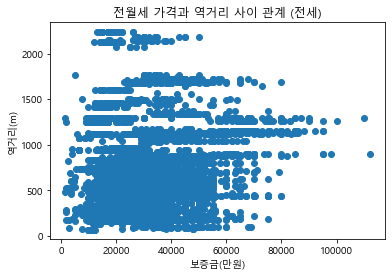

In [27]:
plt.scatter(junse['보증금(만원)'], junse['역거리(m)'])
plt.title('전월세 가격과 역거리 사이 관계 (전세)')
plt.xlabel('보증금(만원)')
plt.ylabel('역거리(m)')

ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20000))    #눈금 간 간격
plt.show()

<ipython-input-28-e15f76bd0a15>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


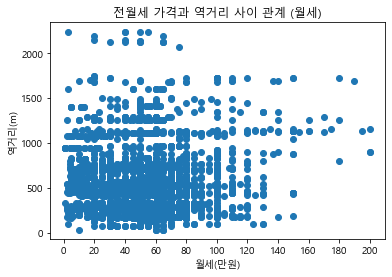

In [28]:
plt.scatter(wolse['월세(만원)'], wolse['역거리(m)'])
plt.title('전월세 가격과 역거리 사이 관계 (월세)')
plt.xlabel('월세(만원)')
plt.ylabel('역거리(m)')

ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.show()

# 전용 면적 따른 전월세 가격 분석

x축: 전월세 가격

y축: 면적

=> 면적이 넓을수록 가격이 비싸다. 역의 경우도 성립한다

In [29]:
nP = pd.read_csv('C:/Users/1102j/anaconda/dataScience/project/아파트(전월세)_노원구_with_역거리.csv', thousands = ',')
nP.head(10)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
0,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202001,6,1000,65,4,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
1,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202007,9,1000,65,5,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
2,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202008,6,1000,65,10,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
3,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202008,21,13000,10,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
4,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202009,7,2000,60,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
5,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202009,7,2000,60,8,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
6,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.00,202012,2,2000,60,4,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
7,서울특별시 노원구 공릉동,670-7,670.0,7.0,6.7디벨리움,월세,17.27,202001,22,1000,62,8,2016,화랑로 443,37.618280,127.076585,153.038912,태릉입구
8,서울특별시 노원구 공릉동,670-7,670.0,7.0,6.7디벨리움,월세,28.91,202002,6,2000,80,17,2016,화랑로 443,37.618280,127.076585,153.038912,태릉입구
9,서울특별시 노원구 공릉동,670-7,670.0,7.0,6.7디벨리움,월세,17.27,202002,21,1000,65,8,2016,화랑로 443,37.618280,127.076585,153.038912,태릉입구


In [30]:
nP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14540 entries, 0 to 14539
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구      14540 non-null  object 
 1   번지       14540 non-null  object 
 2   본번       14540 non-null  float64
 3   부번       14540 non-null  float64
 4   단지명      14540 non-null  object 
 5   전월세구분    14540 non-null  object 
 6   전용면적(㎡)  14540 non-null  float64
 7   계약년월     14540 non-null  int64  
 8   계약일      14540 non-null  int64  
 9   보증금(만원)  14540 non-null  int64  
 10  월세(만원)   14540 non-null  int64  
 11  층        14540 non-null  int64  
 12  건축년도     14540 non-null  int64  
 13  도로명      14540 non-null  object 
 14  위도       14540 non-null  float64
 15  경도       14540 non-null  float64
 16  역거리(m)   14540 non-null  float64
 17  역이름      14540 non-null  object 
dtypes: float64(6), int64(6), object(6)
memory usage: 2.0+ MB


In [35]:
junse = nP.query('전월세구분 == "전세"')
wolse = nP.query('전월세구분 == "월세"')
print(junse.shape)
junse.head(3)

(10538, 18)


,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
18,서울특별시 노원구 공릉동,404-3,404.0,3.0,건영아파트,전세,84.75,202007,18,34000,0,11,1998,동일로173가길 145,37.624416,127.071453,171.632411,공릉
19,서울특별시 노원구 공릉동,744,744.0,0.0,건영장미아파트,전세,84.88,202002,8,35000,0,20,1999,공릉로51길 14-17,37.629039,127.075655,464.671984,공릉
22,서울특별시 노원구 공릉동,744,744.0,0.0,건영장미아파트,전세,84.88,202007,1,40000,0,11,1999,공릉로51길 14-17,37.629039,127.075655,464.671984,공릉


In [36]:
print(wolse.shape)
wolse.head(3)

(4002, 18)


,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
0,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202001,6,1000,65,4,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
1,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202007,9,1000,65,5,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구
2,서울특별시 노원구 공릉동,683-30,683.0,30.0,(683-30),월세,20.0,202008,6,1000,65,10,2019,화랑로 425-7,37.617803,127.074563,34.287113,태릉입구


<ipython-input-37-075ef3a8e025>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


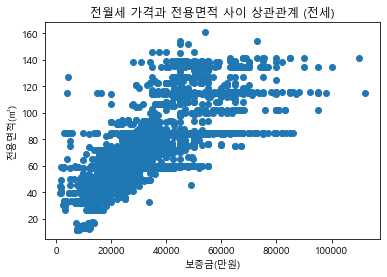

In [37]:
plt.scatter(junse['보증금(만원)'], junse['전용면적(㎡)'])
plt.title('전월세 가격과 전용면적 사이 상관관계 (전세)')
plt.xlabel('보증금(만원)')
plt.ylabel('전용면적(㎡)')

ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20000))    #눈금 간 간격
plt.show()

<ipython-input-38-74a1961ea5df>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


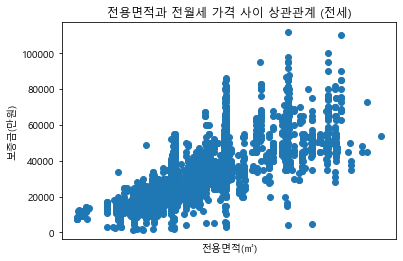

In [38]:
plt.scatter(junse['전용면적(㎡)'], junse['보증금(만원)'])
plt.title('전용면적과 전월세 가격 사이 상관관계 (전세)')
plt.xlabel('전용면적(㎡)')
plt.ylabel('보증금(만원)')

ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20000))    #눈금 간 간격
plt.show()

<ipython-input-39-466eaa6efaaf>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


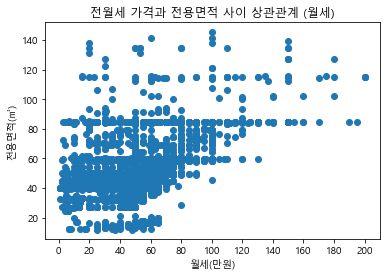

In [39]:
plt.scatter(wolse['월세(만원)'], wolse['전용면적(㎡)'])
plt.title('전월세 가격과 전용면적 사이 상관관계 (월세)')
plt.xlabel('월세(만원)')
plt.ylabel('전용면적(㎡)')

ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.show()

<ipython-input-40-f3ff461707e7>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.axes()


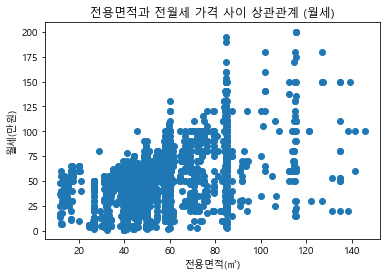

In [40]:
plt.scatter(wolse['전용면적(㎡)'], wolse['월세(만원)'])
plt.title('전용면적과 전월세 가격 사이 상관관계 (월세)')
plt.xlabel('전용면적(㎡)')
plt.ylabel('월세(만원)')

ax=plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
plt.show()

# 면적별 역 거리와 전월세 가격 상관관계 분석

1. 면적 값을 5개 범주로 그룹핑한다

2. 각 그룹 당 역 거리와 가격 간 상관관계를 구한다


x축: 전월세 가격

y축: 역 거리

In [41]:
junse.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10538 entries, 18 to 14538
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   시군구      10538 non-null  object 
 1   번지       10538 non-null  object 
 2   본번       10538 non-null  float64
 3   부번       10538 non-null  float64
 4   단지명      10538 non-null  object 
 5   전월세구분    10538 non-null  object 
 6   전용면적(㎡)  10538 non-null  float64
 7   계약년월     10538 non-null  int64  
 8   계약일      10538 non-null  int64  
 9   보증금(만원)  10538 non-null  int64  
 10  월세(만원)   10538 non-null  int64  
 11  층        10538 non-null  int64  
 12  건축년도     10538 non-null  int64  
 13  도로명      10538 non-null  object 
 14  위도       10538 non-null  float64
 15  경도       10538 non-null  float64
 16  역거리(m)   10538 non-null  float64
 17  역이름      10538 non-null  object 
dtypes: float64(6), int64(6), object(6)
memory usage: 1.5+ MB


In [42]:
wolse[(wolse['전용면적(㎡)'] > 60) & (wolse['전용면적(㎡)'] <= 85)].head(5)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
26,서울특별시 노원구 공릉동,744,744.0,0.0,건영장미아파트,월세,84.88,202007,28,500,20,11,1999,공릉로51길 14-17,37.629039,127.075655,464.671984,공릉
28,서울특별시 노원구 공릉동,744,744.0,0.0,건영장미아파트,월세,84.88,202009,12,12000,70,3,1999,공릉로51길 14-17,37.629039,127.075655,464.671984,공릉
68,서울특별시 노원구 공릉동,749,749.0,0.0,공릉2신도브래뉴아파트,월세,84.75,202003,4,1000,20,3,2002,동일로193길 7,37.625663,127.071995,74.837410,공릉
69,서울특별시 노원구 공릉동,749,749.0,0.0,공릉2신도브래뉴아파트,월세,84.48,202006,18,22000,65,5,2002,동일로193길 7,37.625663,127.071995,74.837410,공릉
73,서울특별시 노원구 공릉동,749,749.0,0.0,공릉2신도브래뉴아파트,월세,72.84,202010,11,20000,70,12,2002,동일로193길 7,37.625663,127.071995,74.837410,공릉


In [43]:
junseXS = junse[junse['전용면적(㎡)'] <= 60]
junseS = junse[(junse['전용면적(㎡)'] > 60) & (junse['전용면적(㎡)'] <= 85)]
junseM = junse[(junse['전용면적(㎡)'] > 85) & (junse['전용면적(㎡)'] <= 102)]
junseL = junse[(junse['전용면적(㎡)'] > 102) & (junse['전용면적(㎡)'] <= 135)]
junseXL = junse[junse['전용면적(㎡)'] > 135]

wolseXS = wolse[wolse['전용면적(㎡)'] <= 60]
wolseS = wolse[(wolse['전용면적(㎡)'] > 60) & (wolse['전용면적(㎡)'] <= 85)]
wolseM = wolse[(wolse['전용면적(㎡)'] > 85) & (wolse['전용면적(㎡)'] <= 102)]
wolseL = wolse[(wolse['전용면적(㎡)'] > 102) & (wolse['전용면적(㎡)'] <= 135)]
wolseXL = wolse[wolse['전용면적(㎡)'] > 135]

In [44]:
wolseXL.head(3)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
1436,서울특별시 노원구 상계동,1318,1318.0,0.0,노원IPARK,월세,145.58,202002,12,22000,100,3,2009,상계로23다길 13-8,37.659834,127.069197,365.985029,상계
9644,서울특별시 노원구 월계동,18,18.0,0.0,한진한화그랑빌,월세,139.08,202003,9,5000,150,22,2002,마들로 31,37.618724,127.067083,437.030216,석계
10267,서울특별시 노원구 중계동,363,363.0,0.0,대림벽산(363),월세,141.45,202006,19,53000,60,7,1993,한글비석로8길 20,37.647839,127.078368,1291.078171,중계


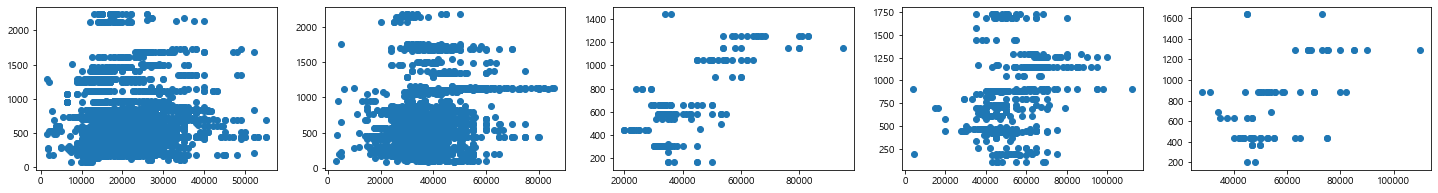

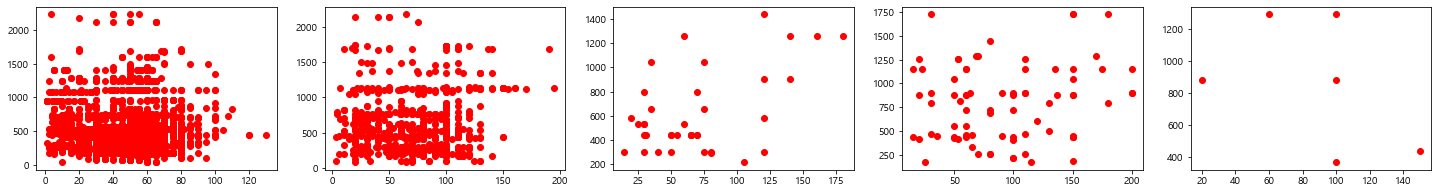

In [45]:
#전세
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    #면적 60㎡이하
    axes[0].scatter(junseXS['보증금(만원)'], junseXS['역거리(m)'])
    
    #면적 60㎡초과 85㎡이하
    axes[1].scatter(junseS['보증금(만원)'], junseS['역거리(m)'])
    
    #면적 85㎡초과 102㎡이하
    axes[2].scatter(junseM['보증금(만원)'], junseM['역거리(m)'])
    
    #면적 102㎡초과 135㎡이하
    axes[3].scatter(junseL['보증금(만원)'], junseL['역거리(m)'])
    
    #면적 135㎡초과
    axes[4].scatter(junseXL['보증금(만원)'], junseXL['역거리(m)'])
    
#월세
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    #면적 60㎡이하
    axes[0].scatter(wolseXS['월세(만원)'], wolseXS['역거리(m)'], c='red')
    
    #면적 60㎡초과 85㎡이하
    axes[1].scatter(wolseS['월세(만원)'], wolseS['역거리(m)'], c='red')
    
    #면적 85㎡초과 102㎡이하
    axes[2].scatter(wolseM['월세(만원)'], wolseM['역거리(m)'], c='red')
    
    #면적 102㎡초과 135㎡이하
    axes[3].scatter(wolseL['월세(만원)'], wolseL['역거리(m)'], c='red')
    
    #면적 135㎡초과
    axes[4].scatter(wolseXL['월세(만원)'], wolseXL['역거리(m)'], c='red')

# 면적과 역 거리 간 상관관계

x축: 전용 면적

y축: 역 거리

=> 면적이 작을수록 역과 가깝다. 역과 가까울수록 면적이 작다

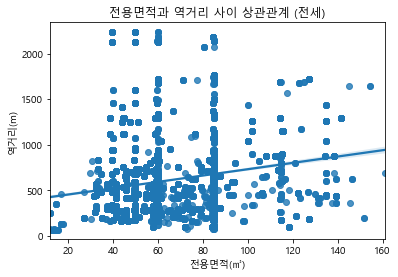

In [54]:
sns.regplot(x='전용면적(㎡)',y='역거리(m)',data=junse, fit_reg=True)
plt.title('전용면적과 역거리 사이 상관관계 (전세)')
plt.show()

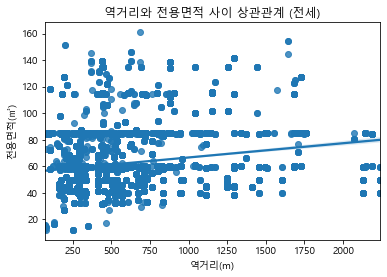

In [55]:
sns.regplot(x='역거리(m)',y='전용면적(㎡)',data=junse, fit_reg=True)
plt.title('역거리와 전용면적 사이 상관관계 (전세)')
plt.show()

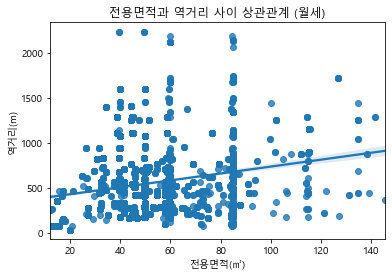

In [56]:
sns.regplot(x='전용면적(㎡)',y='역거리(m)',data=wolse, fit_reg=True)
plt.title('전용면적과 역거리 사이 상관관계 (월세)')
plt.show()

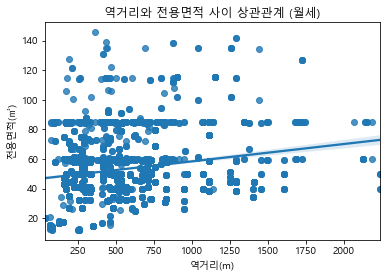

In [57]:
sns.regplot(x='역거리(m)',y='전용면적(㎡)',data=wolse, fit_reg=True)
plt.title('역거리와 전용면적 사이 상관관계 (월세)')
plt.show()

# 역 거리와 전월세 가격 간 상관관계 (역 거리 groupby)

1. 역 거리를 기준으로 groupby한다

2. 역 거리가 동일하면 전월세 값의 평균치를 구한다


x축: 전월세 값 평균

y축: 역 거리

In [58]:
junse_price_avg = junse.groupby(['역거리(m)'], as_index=False).mean()
junse_price_avg.head(5)

,역거리(m),본번,부번,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,위도,경도
0,69.894265,683.0,14.0,13.774781,202006.187500,17.2500,11332.8125,0.0,10.875000,2013.0,37.617522,127.074331
1,74.837410,749.0,0.0,82.272000,202007.400000,14.6000,40800.0000,0.0,8.800000,2002.0,37.625663,127.071995
2,77.372045,395.0,7.0,13.302133,202004.666667,5.0000,10500.0000,0.0,3.333333,2012.0,37.625389,127.073688
3,89.767783,90.0,0.0,84.933333,202006.416667,17.0000,36387.5000,0.0,5.666667,2000.0,37.620931,127.084557
4,93.927530,670.0,20.0,84.034369,202005.187500,15.4375,51321.8750,0.0,16.500000,2016.0,37.618216,127.075912


In [59]:
wolse_price_avg = wolse.groupby(['역거리(m)'], as_index=False).mean()
wolse_price_avg.head(5)

,역거리(m),본번,부번,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,위도,경도
0,34.287113,683.0,30.0,20.000000,202007.714286,8.285714,3142.857143,55.000000,6.714286,2019.0,37.617803,127.074563
1,69.894265,683.0,14.0,14.478990,202006.550000,16.950000,1500.000000,49.500000,13.100000,2013.0,37.617522,127.074331
2,74.837410,749.0,0.0,80.690000,202006.333333,11.000000,14333.333333,51.666667,6.666667,2002.0,37.625663,127.071995
3,77.372045,395.0,7.0,13.485246,202005.461538,16.615385,1115.384615,33.076923,3.000000,2012.0,37.625389,127.073688
4,89.767783,90.0,0.0,84.866667,202006.666667,12.666667,23333.333333,52.666667,7.000000,2000.0,37.620931,127.084557


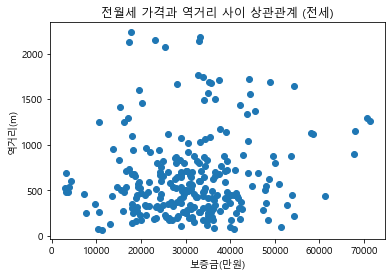

In [60]:
plt.scatter(junse_price_avg['보증금(만원)'], junse_price_avg['역거리(m)'])
plt.title('전월세 가격과 역거리 사이 상관관계 (전세)')
plt.xlabel('보증금(만원)')
plt.ylabel('역거리(m)')

plt.show()

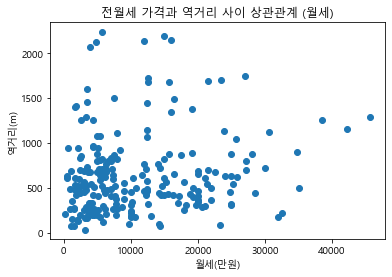

In [71]:
plt.scatter(wolse_price_avg['보증금(만원)'], wolse_price_avg['역거리(m)'])
plt.title('전월세 가격과 역거리 사이 상관관계 (월세)')
plt.xlabel('월세(만원)')
plt.ylabel('역거리(m)')

plt.show()

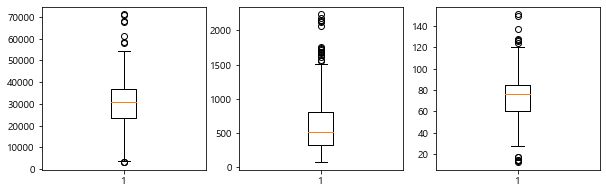

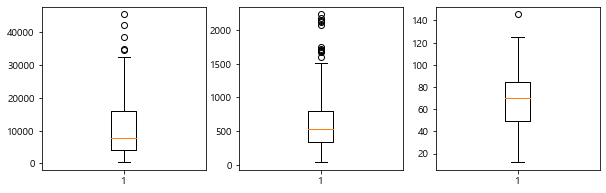

In [62]:
for idx_x in range(1):
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    
    axes[0].boxplot(junse_price_avg['보증금(만원)'])
    axes[1].boxplot(junse_price_avg['역거리(m)'])
    axes[2].boxplot(junse_price_avg['전용면적(㎡)'])
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    
    axes[0].boxplot(wolse_price_avg['보증금(만원)'])
    axes[1].boxplot(wolse_price_avg['역거리(m)'])
    axes[2].boxplot(wolse_price_avg['전용면적(㎡)'])

# 역 거리와 전월세 가격 간 상관관계 (면적 groupby)

1. 전용면적 기준으로 groupby 한다

2. 전용면적이 동일하면 역 거리와 전월세 값의 평균치를 구한다


x축: 전월세 값 평균치
    
y축: 역 거리 평균치

In [63]:
junse_area_avg = junse.groupby(['전용면적(㎡)'], as_index=False).mean()
junse_area_avg.head(5)

,전용면적(㎡),본번,부번,계약년월,계약일,보증금(만원),월세(만원),층,건축년도,위도,경도,역거리(m)
0,12.0000,661.0,21.0,202003.000000,13.000000,7820.000000,0.0,7.4,2011.0,37.618944,127.077438,249.102835
1,12.0880,395.0,7.0,202008.000000,1.000000,7500.000000,0.0,6.0,2012.0,37.625389,127.073688,77.372045
2,12.4200,683.0,14.0,202002.000000,21.000000,12000.000000,0.0,8.0,2013.0,37.617522,127.074331,69.894265
3,13.2195,683.0,14.0,202006.142857,15.857143,11278.571429,0.0,13.0,2013.0,37.617522,127.074331,69.894265
4,13.6200,683.0,14.0,202005.250000,27.500000,11075.000000,0.0,8.0,2013.0,37.617522,127.074331,69.894265


In [64]:
wolse_area_avg = wolse.groupby(['전용면적(㎡)'], as_index=False).mean()
wolse_area_avg.head(5)

,전용면적(㎡),본번,부번,계약년월,계약일,보증금(만원),월세(만원),층,건축년도,위도,경도,역거리(m)
0,12.0000,661.0,21.0,202003.333333,17.000000,3000.000000,36.666667,9.666667,2011.0,37.618944,127.077438,249.102835
1,12.0600,661.0,20.0,202010.000000,18.333333,166.666667,16.000000,10.666667,2014.0,37.618909,127.077593,259.844908
2,12.1100,661.0,20.0,202008.000000,4.000000,200.000000,18.000000,13.000000,2014.0,37.618909,127.077593,259.844908
3,12.1700,661.0,20.0,202007.000000,16.500000,2135.000000,7.500000,8.500000,2014.0,37.618909,127.077593,259.844908
4,12.2372,395.0,7.0,202007.000000,15.500000,750.000000,37.500000,5.000000,2012.0,37.625389,127.073688,77.372045


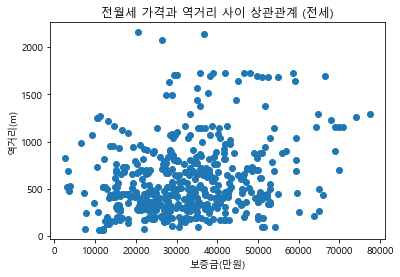

In [65]:
plt.scatter(junse_area_avg['보증금(만원)'], junse_area_avg['역거리(m)'])
plt.title('전월세 가격과 역거리 사이 상관관계 (전세)')
plt.xlabel('보증금(만원)')
plt.ylabel('역거리(m)')

plt.show()

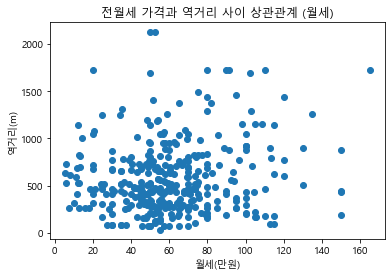

In [70]:
plt.scatter(wolse_area_avg['월세(만원)'], wolse_area_avg['역거리(m)'])
plt.title('전월세 가격과 역거리 사이 상관관계 (월세)')
plt.xlabel('월세(만원)')
plt.ylabel('역거리(m)')

plt.show()

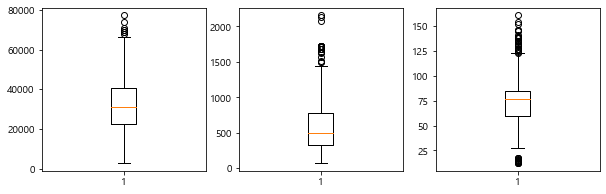

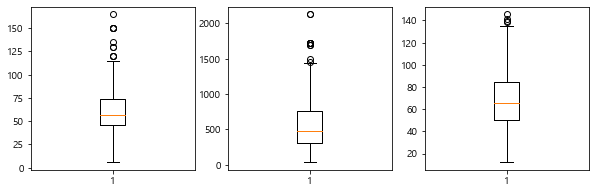

In [67]:
for idx_x in range(1):
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    
    axes[0].boxplot(junse_area_avg['보증금(만원)'])
    axes[1].boxplot(junse_area_avg['역거리(m)'])
    axes[2].boxplot(junse_area_avg['전용면적(㎡)'])
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    
    axes[0].boxplot(wolse_area_avg['월세(만원)'])
    axes[1].boxplot(wolse_area_avg['역거리(m)'])
    axes[2].boxplot(wolse_area_avg['전용면적(㎡)'])

# 역 거리와 전월세 가격 간 상관관계 (역 거리, 전용면적 groupby)

1. 역 거리로 groupby 한다

2. 전용면적으로 groupy한다

3. 전월세 가격의 평균을 구한다


x축: 전월세 가격 평균

y축: 역과의 거리 평균

In [68]:
junse_sub_area_avg = junse_price_avg.groupby(['전용면적(㎡)'], as_index=False).mean()
junse_sub_area_avg.head(5)

,전용면적(㎡),역거리(m),본번,부번,계약년월,계약일,보증금(만원),월세(만원),층,건축년도,위도,경도
0,12.000000,249.102835,661.0,21.0,202003.000000,13.00,7820.0000,0.0,7.400000,2011.0,37.618944,127.077438
1,13.302133,77.372045,395.0,7.0,202004.666667,5.00,10500.0000,0.0,3.333333,2012.0,37.625389,127.073688
2,13.774781,69.894265,683.0,14.0,202006.187500,17.25,11332.8125,0.0,10.875000,2013.0,37.617522,127.074331
3,14.650000,350.047605,330.0,29.0,202005.600000,12.40,9800.0000,0.0,6.800000,2014.0,37.656436,127.066124
4,16.936250,129.013800,670.0,6.0,202006.250000,18.00,13018.7500,0.0,14.750000,2018.0,37.618238,127.076317


In [69]:
wolse_sub_area_avg = wolse_price_avg.groupby(['전용면적(㎡)'], as_index=False).mean()
wolse_sub_area_avg.head(5)

,전용면적(㎡),역거리(m),본번,부번,계약년월,계약일,보증금(만원),월세(만원),층,건축년도,위도,경도
0,12.000000,249.102835,661.0,21.0,202003.333333,17.000000,3000.000000,36.666667,9.666667,2011.0,37.618944,127.077438
1,12.236250,259.844908,661.0,20.0,202008.625000,14.250000,943.750000,13.250000,10.500000,2014.0,37.618909,127.077593
2,13.485246,77.372045,395.0,7.0,202005.461538,16.615385,1115.384615,33.076923,3.000000,2012.0,37.625389,127.073688
3,14.478990,69.894265,683.0,14.0,202006.550000,16.950000,1500.000000,49.500000,13.100000,2013.0,37.617522,127.074331
4,14.650000,350.047605,330.0,29.0,202005.290323,15.709677,1219.354839,45.483871,6.580645,2014.0,37.656436,127.066124


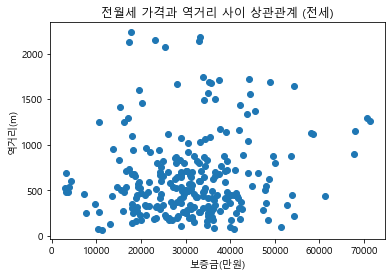

In [72]:
plt.scatter(junse_sub_area_avg['보증금(만원)'], junse_sub_area_avg['역거리(m)'])
plt.title('전월세 가격과 역거리 사이 상관관계 (전세)')
plt.xlabel('보증금(만원)')
plt.ylabel('역거리(m)')

plt.show()

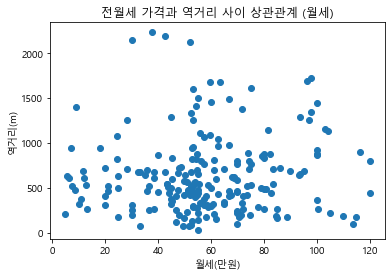

In [73]:
plt.scatter(wolse_sub_area_avg['월세(만원)'], wolse_sub_area_avg['역거리(m)'])
plt.title('전월세 가격과 역거리 사이 상관관계 (월세)')
plt.xlabel('월세(만원)')
plt.ylabel('역거리(m)')

plt.show()

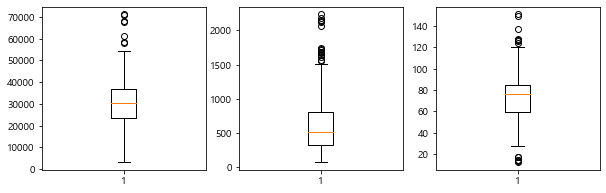

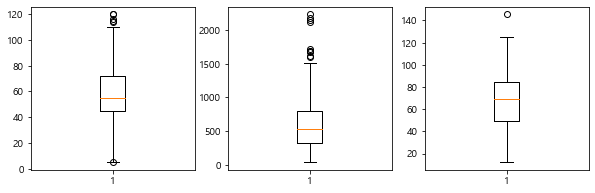

In [74]:
for idx_x in range(1):
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    
    axes[0].boxplot(junse_sub_area_avg['보증금(만원)'])
    axes[1].boxplot(junse_sub_area_avg['역거리(m)'])
    axes[2].boxplot(junse_sub_area_avg['전용면적(㎡)'])
    
for idx_x in range(1):
    fig, axes = plt.subplots(1, 3, figsize=(10, 3))
    
    axes[0].boxplot(wolse_sub_area_avg['월세(만원)'])
    axes[1].boxplot(wolse_sub_area_avg['역거리(m)'])
    axes[2].boxplot(wolse_sub_area_avg['전용면적(㎡)'])

# 역 거리와 전월세 가격 간 상관관계 (역 거리 groupby, 면적 5개 그룹)

1. 역 거리로 groupby한다

2. 역 거리가 동일하면 전월세 값의 평균을 구한다

3. 전용 면적 기준 5개로 분류한다


x축: 전월세 가격 평균
    
y축: 역 거리

In [75]:
junseXS = junse_price_avg[junse_price_avg['전용면적(㎡)'] <= 60]
junseS = junse_price_avg[(junse_price_avg['전용면적(㎡)'] > 60) & (junse_price_avg['전용면적(㎡)'] <= 85)]
junseM = junse_price_avg[(junse_price_avg['전용면적(㎡)'] > 85) & (junse_price_avg['전용면적(㎡)'] <= 102)]
junseL = junse_price_avg[(junse_price_avg['전용면적(㎡)'] > 102) & (junse_price_avg['전용면적(㎡)'] <= 135)]
junseXL = junse_price_avg[junse_price_avg['전용면적(㎡)'] > 135]

wolseXS = wolse_price_avg[wolse_price_avg['전용면적(㎡)'] <= 60]
wolseS = wolse_price_avg[(wolse_price_avg['전용면적(㎡)'] > 60) & (wolse_price_avg['전용면적(㎡)'] <= 85)]
wolseM = wolse_price_avg[(wolse_price_avg['전용면적(㎡)'] > 85) & (wolse_price_avg['전용면적(㎡)'] <= 102)]
wolseL = wolse_price_avg[(wolse_price_avg['전용면적(㎡)'] > 102) & (wolse_price_avg['전용면적(㎡)'] <= 135)]
wolseXL = wolse_price_avg[wolse_price_avg['전용면적(㎡)'] > 135]

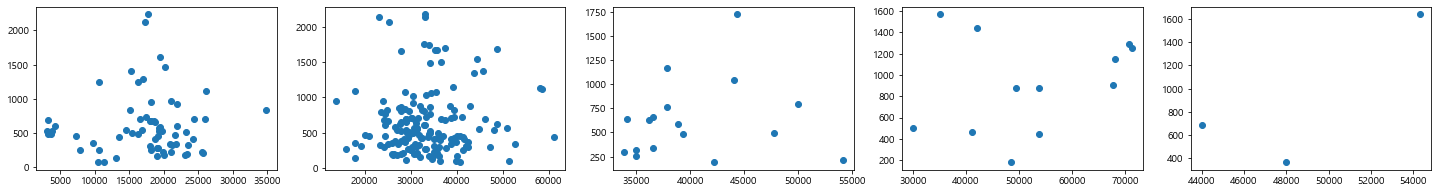

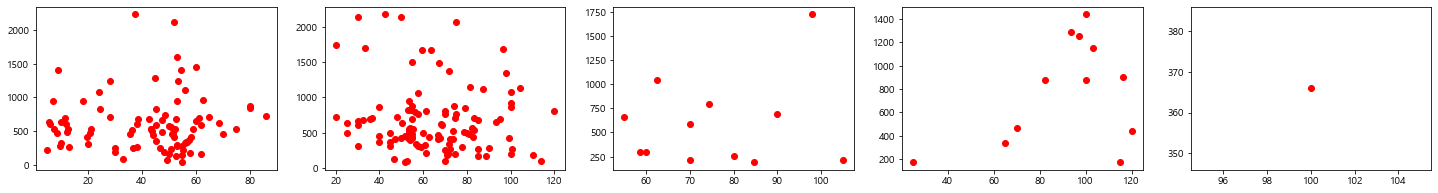

In [76]:
#전세
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    #면적 60㎡이하
    axes[0].scatter(junseXS['보증금(만원)'], junseXS['역거리(m)'])
    
    #면적 60㎡초과 85㎡이하
    axes[1].scatter(junseS['보증금(만원)'], junseS['역거리(m)'])
    
    #면적 85㎡초과 102㎡이하
    axes[2].scatter(junseM['보증금(만원)'], junseM['역거리(m)'])
    
    #면적 102㎡초과 135㎡이하
    axes[3].scatter(junseL['보증금(만원)'], junseL['역거리(m)'])
    
    #면적 135㎡초과
    axes[4].scatter(junseXL['보증금(만원)'], junseXL['역거리(m)'])
    
#월세
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    #면적 60㎡이하
    axes[0].scatter(wolseXS['월세(만원)'], wolseXS['역거리(m)'], c='red')
    
    #면적 60㎡초과 85㎡이하
    axes[1].scatter(wolseS['월세(만원)'], wolseS['역거리(m)'], c='red')
    
    #면적 85㎡초과 102㎡이하
    axes[2].scatter(wolseM['월세(만원)'], wolseM['역거리(m)'], c='red')
    
    #면적 102㎡초과 135㎡이하
    axes[3].scatter(wolseL['월세(만원)'], wolseL['역거리(m)'], c='red')
    
    #면적 135㎡초과
    axes[4].scatter(wolseXL['월세(만원)'], wolseXL['역거리(m)'], c='red')

# 역 거리와 전월세 가격 간 상관관계 (전용면적 groupby, 면적 5개 그룹)

1. 전용면적으로 groupby한다

2. 전용면적이 동일하면 전월세 값의 평균을 구한다

3. 전용 면적 기준 5개로 분류한다


x축: 전월세 가격 평균
    
y축: 역 거리

In [77]:
junseXS = junse_area_avg[junse_area_avg['전용면적(㎡)'] <= 60]
junseS = junse_area_avg[(junse_area_avg['전용면적(㎡)'] > 60) & (junse_area_avg['전용면적(㎡)'] <= 85)]
junseM = junse_area_avg[(junse_area_avg['전용면적(㎡)'] > 85) & (junse_area_avg['전용면적(㎡)'] <= 102)]
junseL = junse_area_avg[(junse_area_avg['전용면적(㎡)'] > 102) & (junse_area_avg['전용면적(㎡)'] <= 135)]
junseXL = junse_area_avg[junse_area_avg['전용면적(㎡)'] > 135]

wolseXS = wolse_area_avg[wolse_area_avg['전용면적(㎡)'] <= 60]
wolseS = wolse_area_avg[(wolse_area_avg['전용면적(㎡)'] > 60) & (wolse_area_avg['전용면적(㎡)'] <= 85)]
wolseM = wolse_area_avg[(wolse_area_avg['전용면적(㎡)'] > 85) & (wolse_area_avg['전용면적(㎡)'] <= 102)]
wolseL = wolse_area_avg[(wolse_area_avg['전용면적(㎡)'] > 102) & (wolse_area_avg['전용면적(㎡)'] <= 135)]
wolseXL = wolse_area_avg[wolse_area_avg['전용면적(㎡)'] > 135]

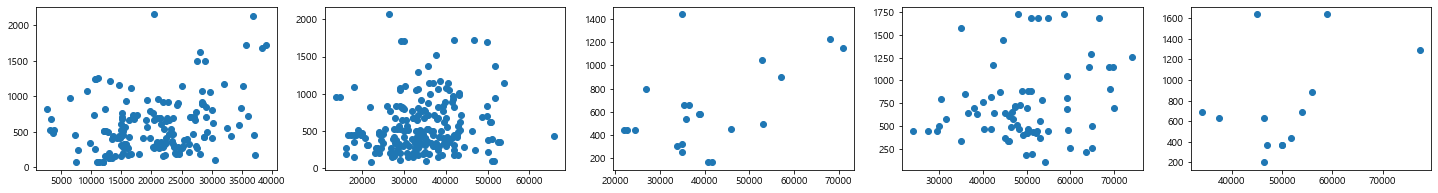

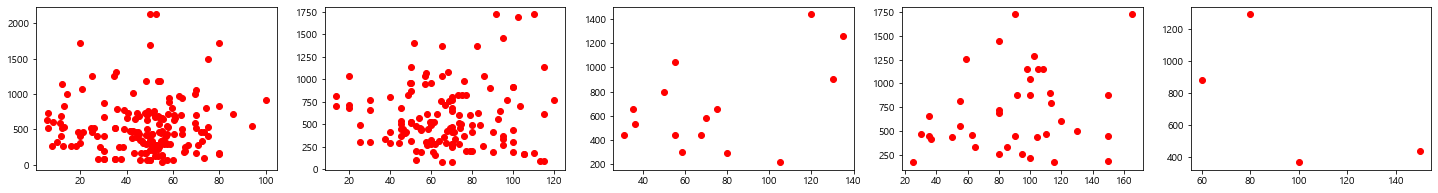

In [78]:
#전세
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    #면적 60㎡이하
    axes[0].scatter(junseXS['보증금(만원)'], junseXS['역거리(m)'])
    
    #면적 60㎡초과 85㎡이하
    axes[1].scatter(junseS['보증금(만원)'], junseS['역거리(m)'])
    
    #면적 85㎡초과 102㎡이하
    axes[2].scatter(junseM['보증금(만원)'], junseM['역거리(m)'])
    
    #면적 102㎡초과 135㎡이하
    axes[3].scatter(junseL['보증금(만원)'], junseL['역거리(m)'])
    
    #면적 135㎡초과
    axes[4].scatter(junseXL['보증금(만원)'], junseXL['역거리(m)'])
    
#월세
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    #면적 60㎡이하
    axes[0].scatter(wolseXS['월세(만원)'], wolseXS['역거리(m)'], c='red')
    
    #면적 60㎡초과 85㎡이하
    axes[1].scatter(wolseS['월세(만원)'], wolseS['역거리(m)'], c='red')
    
    #면적 85㎡초과 102㎡이하
    axes[2].scatter(wolseM['월세(만원)'], wolseM['역거리(m)'], c='red')
    
    #면적 102㎡초과 135㎡이하
    axes[3].scatter(wolseL['월세(만원)'], wolseL['역거리(m)'], c='red')
    
    #면적 135㎡초과
    axes[4].scatter(wolseXL['월세(만원)'], wolseXL['역거리(m)'], c='red')

# 역 거리와 전월세 가격 간 상관관계 (역 거리, 전용면적 groupby, 면적5개 그룹)

1. 역 거리로 groupby한다

2. 전용면적으로 groupy한다

3. 전월세 값의 평균을 구한다

4. 전용 면적 기준 5개로 분류한다



x축: 전월세 가격 평균

y축: 역과의 거리 평균

In [79]:
junseXS = junse_sub_area_avg[junse_sub_area_avg['전용면적(㎡)'] <= 60]
junseS = junse_sub_area_avg[(junse_sub_area_avg['전용면적(㎡)'] > 60) & (junse_sub_area_avg['전용면적(㎡)'] <= 85)]
junseM = junse_sub_area_avg[(junse_sub_area_avg['전용면적(㎡)'] > 85) & (junse_sub_area_avg['전용면적(㎡)'] <= 102)]
junseL = junse_sub_area_avg[(junse_sub_area_avg['전용면적(㎡)'] > 102) & (junse_sub_area_avg['전용면적(㎡)'] <= 135)]
junseXL = junse_sub_area_avg[junse_sub_area_avg['전용면적(㎡)'] > 135]

wolseXS = wolse_sub_area_avg[wolse_sub_area_avg['전용면적(㎡)'] <= 60]
wolseS = wolse_sub_area_avg[(wolse_sub_area_avg['전용면적(㎡)'] > 60) & (wolse_sub_area_avg['전용면적(㎡)'] <= 85)]
wolseM = wolse_sub_area_avg[(wolse_sub_area_avg['전용면적(㎡)'] > 85) & (wolse_sub_area_avg['전용면적(㎡)'] <= 102)]
wolseL = wolse_sub_area_avg[(wolse_sub_area_avg['전용면적(㎡)'] > 102) & (wolse_sub_area_avg['전용면적(㎡)'] <= 135)]
wolseXL = wolse_sub_area_avg[wolse_sub_area_avg['전용면적(㎡)'] > 135]

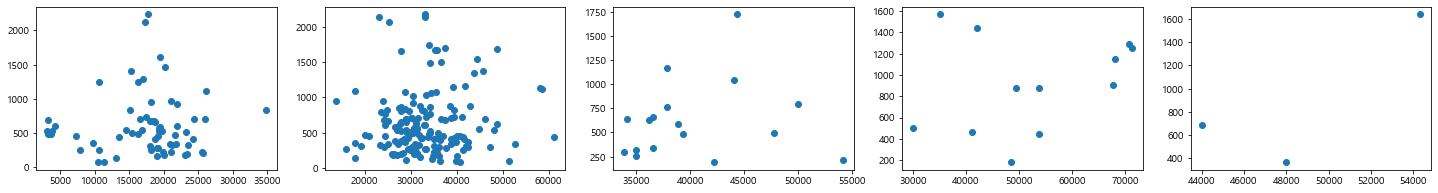

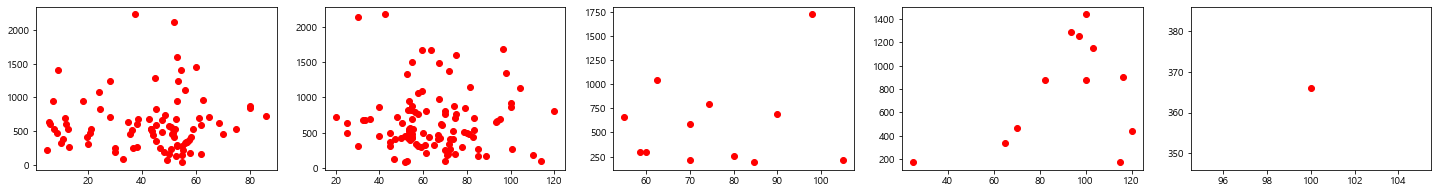

In [80]:
#전세
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    #면적 60㎡이하
    axes[0].scatter(junseXS['보증금(만원)'], junseXS['역거리(m)'])
    
    #면적 60㎡초과 85㎡이하
    axes[1].scatter(junseS['보증금(만원)'], junseS['역거리(m)'])
    
    #면적 85㎡초과 102㎡이하
    axes[2].scatter(junseM['보증금(만원)'], junseM['역거리(m)'])
    
    #면적 102㎡초과 135㎡이하
    axes[3].scatter(junseL['보증금(만원)'], junseL['역거리(m)'])
    
    #면적 135㎡초과
    axes[4].scatter(junseXL['보증금(만원)'], junseXL['역거리(m)'])
    
#월세
for idx_x in range(1):
    fig, axes = plt.subplots(1, 5, figsize=(25, 3))
    
    #면적 60㎡이하
    axes[0].scatter(wolseXS['월세(만원)'], wolseXS['역거리(m)'], c='red')
    
    #면적 60㎡초과 85㎡이하
    axes[1].scatter(wolseS['월세(만원)'], wolseS['역거리(m)'], c='red')
    
    #면적 85㎡초과 102㎡이하
    axes[2].scatter(wolseM['월세(만원)'], wolseM['역거리(m)'], c='red')
    
    #면적 102㎡초과 135㎡이하
    axes[3].scatter(wolseL['월세(만원)'], wolseL['역거리(m)'], c='red')
    
    #면적 135㎡초과
    axes[4].scatter(wolseXL['월세(만원)'], wolseXL['역거리(m)'], c='red')

# 면적이 동일한 경우 역 거리와 전월세 값 분석

1. 가장 전용면적이 많은 면적을 찾는다

2. 역거리 기준으로 groupby 한다

3. 역거리가 동일하면 전월세 값의 평균을 구한다

=> 역에서 가까울수록 전월세 가격이 비싸다

In [81]:
junse['전용면적(㎡)'].value_counts()

49.940    556
58.010    496
41.300    469
45.900    263
44.520    263
         ... 
30.600      1
12.420      1
67.239      1
82.970      1
71.140      1
Name: 전용면적(㎡), Length: 482, dtype: int64

In [82]:
junse_same_area = junse[junse['전용면적(㎡)'] == 49.940]
junse_same_area.head(5)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
2611,서울특별시 노원구 상계동,765,765.0,0.0,상계주공1(고층),전세,49.94,202002,2,16000,0,11,1988,덕릉로 459-21,37.64771,127.060019,452.622663,중계
2641,서울특별시 노원구 상계동,765,765.0,0.0,상계주공1(고층),전세,49.94,202003,5,19000,0,15,1988,덕릉로 459-21,37.64771,127.060019,452.622663,중계
2665,서울특별시 노원구 상계동,765,765.0,0.0,상계주공1(고층),전세,49.94,202004,14,18000,0,3,1988,덕릉로 459-21,37.64771,127.060019,452.622663,중계
2669,서울특별시 노원구 상계동,765,765.0,0.0,상계주공1(고층),전세,49.94,202004,24,17000,0,3,1988,덕릉로 459-21,37.64771,127.060019,452.622663,중계
2686,서울특별시 노원구 상계동,765,765.0,0.0,상계주공1(고층),전세,49.94,202005,11,20000,0,13,1988,덕릉로 459-21,37.64771,127.060019,452.622663,중계


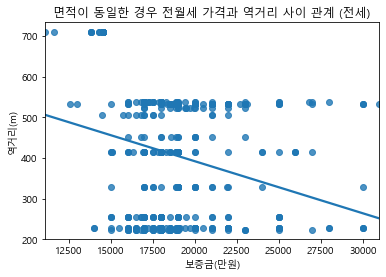

In [84]:
sns.regplot(x='보증금(만원)',y='역거리(m)',data=junse_same_area, fit_reg=True, ci=None)
plt.title('면적이 동일한 경우 전월세 가격과 역거리 사이 관계 (전세)')
plt.show()

In [85]:
junse_same_area_sub = junse_same_area.groupby(['역거리(m)'], as_index=False).mean()
junse_same_area_sub.head(5)

,역거리(m),본번,부번,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,위도,경도
0,224.004634,652.0,0.0,49.94,202005.584906,15.245283,18431.132075,0.0,7.528302,1988.0,37.666897,127.056039
1,226.825686,670.0,0.0,49.94,202006.460784,16.980392,19418.872549,0.0,7.872549,1988.0,37.664617,127.059817
2,254.740702,647.0,0.0,49.94,202005.933333,16.783333,18435.000000,0.0,6.300000,1988.0,37.666934,127.059168
3,329.140835,720.0,0.0,49.94,202005.733333,17.300000,19490.000000,0.0,6.366667,1988.0,37.654704,127.066191
4,414.582740,666.0,0.0,49.94,202006.359375,14.171875,18713.125000,0.0,7.062500,1988.0,37.664113,127.052814


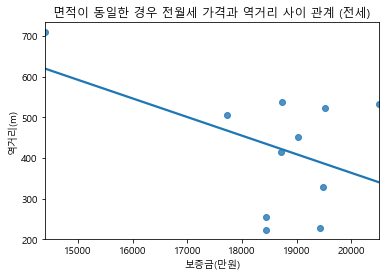

In [86]:
sns.regplot(x='보증금(만원)',y='역거리(m)',data=junse_same_area_sub, fit_reg=True, ci=None)
plt.title('면적이 동일한 경우 전월세 가격과 역거리 사이 관계 (전세)')
plt.show()

In [87]:
wolse['전용면적(㎡)'].value_counts()

41.3000     264
49.9400     243
58.0100     184
44.5200     165
27.0000     106
           ... 
75.2000       1
84.9200       1
13.2195       1
59.9927       1
100.8200      1
Name: 전용면적(㎡), Length: 357, dtype: int64

In [88]:
wolse_same_area = wolse[wolse['전용면적(㎡)'] == 41.3000]
wolse_same_area.head(5)

,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
2595,서울특별시 노원구 상계동,765,765.0,0.0,상계주공1(고층),월세,41.3,202001,10,1000,50,11,1988,덕릉로 459-21,37.64771,127.060019,452.622663,중계
2626,서울특별시 노원구 상계동,765,765.0,0.0,상계주공1(고층),월세,41.3,202002,11,2000,55,6,1988,동일로213길 21,37.64771,127.060019,452.622663,중계
2664,서울특별시 노원구 상계동,765,765.0,0.0,상계주공1(고층),월세,41.3,202004,11,1000,55,9,1988,동일로213길 21,37.64771,127.060019,452.622663,중계
2703,서울특별시 노원구 상계동,765,765.0,0.0,상계주공1(고층),월세,41.3,202005,25,560,50,4,1988,동일로213길 21,37.64771,127.060019,452.622663,중계
2706,서울특별시 노원구 상계동,765,765.0,0.0,상계주공1(고층),월세,41.3,202006,1,1000,58,7,1988,동일로213길 21,37.64771,127.060019,452.622663,중계


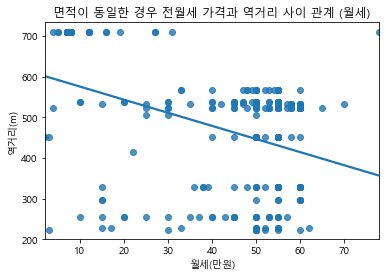

In [89]:
sns.regplot(x='월세(만원)',y='역거리(m)',data=wolse_same_area, fit_reg=True, ci=None)
plt.title('면적이 동일한 경우 전월세 가격과 역거리 사이 관계 (월세)')
plt.show()

In [90]:
wolse_same_area_sub = wolse_same_area.groupby(['역거리(m)'], as_index=False).mean()
wolse_same_area_sub.head(5)

,역거리(m),본번,부번,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,위도,경도
0,224.004634,652.0,0.0,41.3,202005.900000,10.600000,2720.000000,45.000000,6.500000,1988.0,37.666897,127.056039
1,226.825686,670.0,0.0,41.3,202006.363636,18.090909,3590.909091,44.909091,7.727273,1988.0,37.664617,127.059817
2,254.740702,647.0,0.0,41.3,202005.538462,14.769231,3211.538462,41.384615,6.961538,1988.0,37.666934,127.059168
3,297.529181,730.0,2.0,41.3,202006.777778,17.777778,3333.333333,47.777778,7.888889,1987.0,37.652527,127.060601
4,329.140835,720.0,0.0,41.3,202005.166667,13.633333,2000.000000,51.366667,7.333333,1988.0,37.654704,127.066191


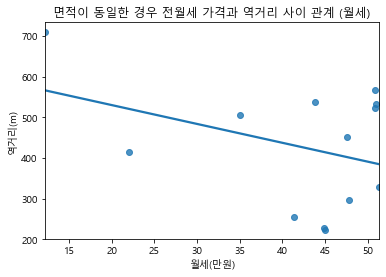

In [91]:
sns.regplot(x='월세(만원)',y='역거리(m)',data=wolse_same_area_sub, fit_reg=True, ci=None)
plt.title('면적이 동일한 경우 전월세 가격과 역거리 사이 관계 (월세)')
plt.show()

# 전용면적이 비슷한 경우 역 거리와 전월세 값 분석

1. 가장 전용면적이 많은 면적을 찾는다

2. 가장 많은 전용면적의 반올림값 a을 구한다

3. (a - 5㎡ ~ a + 5㎡) 만큼의 전용면적을 가지는 매물만 뽑는다

4. 역거리 기준으로 groupby 한다

5. 역거리가 동일하면 전월세 값의 평균을 구한다

=> 역에서 가까울수록 전월세 가격이 비싸다

In [92]:
junse['전용면적(㎡)'].value_counts()

49.940    556
58.010    496
41.300    469
45.900    263
44.520    263
         ... 
30.600      1
12.420      1
67.239      1
82.970      1
71.140      1
Name: 전용면적(㎡), Length: 482, dtype: int64

In [93]:
junse_top_area = junse[(junse['전용면적(㎡)'] >= 45) & (junse['전용면적(㎡)'] <=55)]
print(len(junse_top_area))
junse_top_area.head(5)

2584


,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
345,서울특별시 노원구 공릉동,109,109.0,0.0,비선아파트,전세,48.60,202001,16,20000,0,1,1999,화랑로51길 78,37.625818,127.087828,699.810032,화랑대
347,서울특별시 노원구 공릉동,109,109.0,0.0,비선아파트,전세,48.60,202002,6,22000,0,4,1999,화랑로51길 78,37.625818,127.087828,699.810032,화랑대
351,서울특별시 노원구 공릉동,109,109.0,0.0,비선아파트,전세,49.28,202002,13,21000,0,2,1999,화랑로51길 78,37.625818,127.087828,699.810032,화랑대
352,서울특별시 노원구 공릉동,109,109.0,0.0,비선아파트,전세,49.28,202002,16,21000,0,3,1999,화랑로51길 78,37.625818,127.087828,699.810032,화랑대
355,서울특별시 노원구 공릉동,109,109.0,0.0,비선아파트,전세,48.60,202002,21,23000,0,4,1999,화랑로51길 78,37.625818,127.087828,699.810032,화랑대


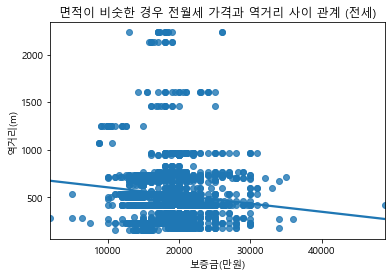

In [96]:
sns.regplot(x='보증금(만원)',y='역거리(m)',data=junse_top_area, fit_reg=True, ci=None)
plt.title('면적이 비숫한 경우 전월세 가격과 역거리 사이 관계 (전세)')
plt.show()

In [95]:
junse_top_area_sub = junse_top_area.groupby(['역거리(m)'], as_index=False).mean()
print(len(junse_top_area_sub))
junse_top_area_sub.head(5)

48


,역거리(m),본번,부번,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,위도,경도
0,160.489865,173.0,1.0,46.800000,202005.883721,15.534884,14874.767442,0.0,9.558140,1989.0,37.662303,127.073582
1,173.910856,502.0,1.0,49.565468,202005.942446,15.287770,21104.316547,0.0,7.741007,1990.0,37.644597,127.062270
2,204.556556,1110.0,0.0,51.660000,202007.000000,18.428571,24642.857143,0.0,8.142857,1994.0,37.678017,127.052914
3,224.004634,652.0,0.0,49.940000,202005.584906,15.245283,18431.132075,0.0,7.528302,1988.0,37.666897,127.056039
4,225.196669,757.0,0.0,49.600000,202007.500000,22.000000,23000.000000,0.0,8.000000,2006.0,37.626052,127.070359


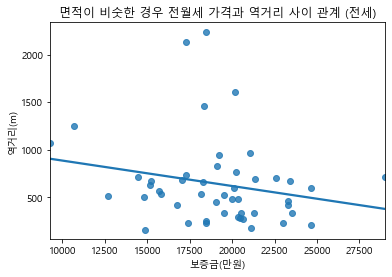

In [97]:
sns.regplot(x='보증금(만원)',y='역거리(m)',data=junse_top_area_sub, fit_reg=True, ci=None)
plt.title('면적이 비숫한 경우 전월세 가격과 역거리 사이 관계 (전세)')
plt.show()

In [98]:
wolse['전용면적(㎡)'].value_counts()

41.3000     264
49.9400     243
58.0100     184
44.5200     165
27.0000     106
           ... 
75.2000       1
84.9200       1
13.2195       1
59.9927       1
100.8200      1
Name: 전용면적(㎡), Length: 357, dtype: int64

In [103]:
wolse_top_area = wolse[(wolse['전용면적(㎡)'] >= 36) & (wolse['전용면적(㎡)'] <= 46)]
print(len(wolse_top_area))
wolse_top_area.head(3)

1164


,시군구,번지,본번,부번,단지명,전월세구분,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,도로명,위도,경도,역거리(m),역이름
121,서울특별시 노원구 공릉동,110,110.0,0.0,공릉아파트,월세,39.84,202012,22,3275,7,14,1999,화랑로51길 81,37.625035,127.087400,604.957270,화랑대
140,서울특별시 노원구 공릉동,428-7,428.0,7.0,공릉행복주택,월세,36.48,202011,18,7004,27,7,2019,공릉로51길 20,37.628393,127.075703,408.441898,공릉
141,서울특별시 노원구 공릉동,428-7,428.0,7.0,공릉행복주택,월세,40.32,202012,7,7692,30,5,2019,공릉로51길 20,37.628393,127.075703,408.441898,공릉


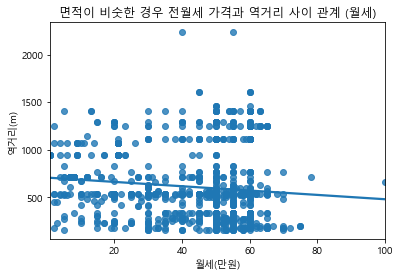

In [100]:
sns.regplot(x='월세(만원)',y='역거리(m)',data=wolse_top_area, fit_reg=True, ci=None)
plt.title('면적이 비숫한 경우 전월세 가격과 역거리 사이 관계 (월세)')
plt.show()

In [101]:
wolse_top_area_sub = wolse_top_area.groupby(['역거리(m)'], as_index=False).mean()
print(len(wolse_top_area_sub))
wolse_top_area_sub.head(5)

49


,역거리(m),본번,부번,전용면적(㎡),계약년월,계약일,보증금(만원),월세(만원),층,건축년도,위도,경도
0,160.489865,173.0,1.0,43.350000,202005.166667,15.100000,2070.000000,47.666667,7.133333,1989.0,37.662303,127.073582
1,173.910856,502.0,1.0,40.392941,202006.088235,16.661765,2719.117647,52.588235,7.955882,1990.0,37.644597,127.062270
2,193.647299,284.0,0.0,44.520000,202005.000000,10.769231,2488.461538,63.615385,7.769231,1988.0,37.638160,127.068031
3,224.004634,652.0,0.0,41.300000,202005.900000,10.600000,2720.000000,45.000000,6.500000,1988.0,37.666897,127.056039
4,226.825686,670.0,0.0,44.761957,202006.086957,15.608696,3261.956522,43.043478,7.652174,1988.0,37.664617,127.059817


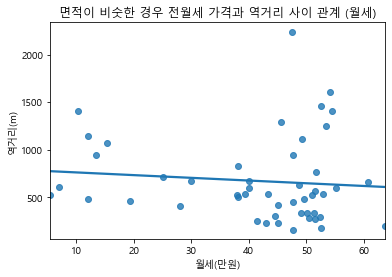

In [102]:
sns.regplot(x='월세(만원)',y='역거리(m)',data=wolse_top_area_sub, fit_reg=True, ci=None)
plt.title('면적이 비숫한 경우 전월세 가격과 역거리 사이 관계 (월세)')
plt.show()

# 역 거리 별 거래량

전월세 모두 역과의 거리가 500m 이내의 매물의 거래량이 약 절반, 1000m 이내의 매물이 과반수를 차지한다

월세의 경우 그 경향이 더욱 두드러지게 나타난다

85㎡미만의 경우 역과의 거리가 가까운 매물의 거래량이 더욱 많다.

85㎡이상의 경우 경향성이 나타나지 않는다

In [293]:
junse['역거리(m)'].median()

523.7716057297387

In [294]:
wolse['역거리(m)'].median()

504.7004278798892

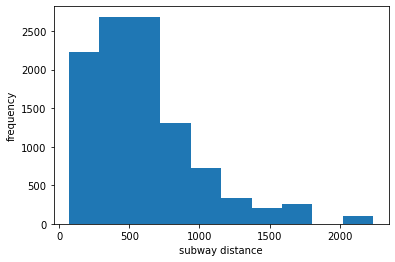

In [289]:
#전세 전채 거래량
plt.hist(junse['역거리(m)'])
plt.xlabel('subway distance')
plt.ylabel('frequency')
plt.show()

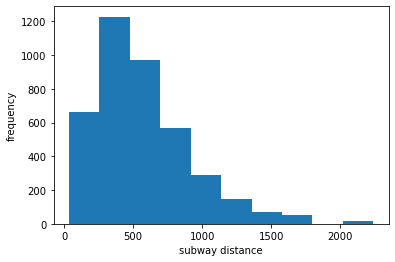

In [290]:
#월세 전체 거래량
plt.hist(wolse['역거리(m)'])
plt.xlabel('subway distance')
plt.ylabel('frequency')
plt.show()

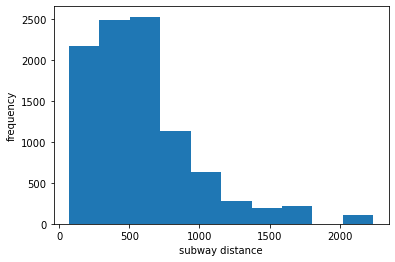

In [319]:
#85㎡미만 전세 거래량
plt.hist(junse[junse['전용면적(㎡)'] < 85]['역거리(m)'])
plt.xlabel('subway distance')
plt.ylabel('frequency')
plt.show()

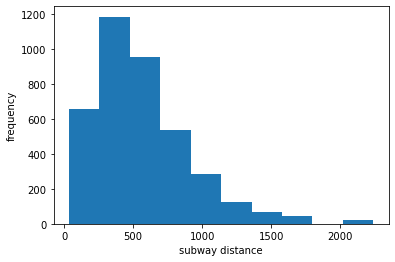

In [320]:
#85㎡미만 월세 거래량
plt.hist(wolse[wolse['전용면적(㎡)'] < 85]['역거리(m)'])
plt.xlabel('subway distance')
plt.ylabel('frequency')
plt.show()

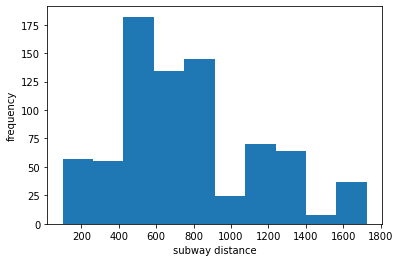

In [323]:
#85㎡이상 전세 거래량
plt.hist(junse[junse['전용면적(㎡)'] >= 85]['역거리(m)'])
plt.xlabel('subway distance')
plt.ylabel('frequency')
plt.show()

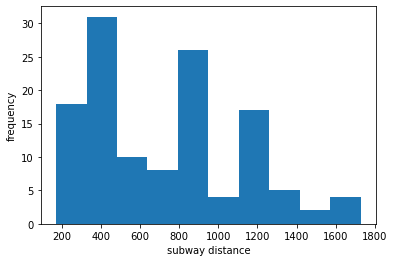

In [324]:
#85㎡이상 월세 거래량
plt.hist(wolse[wolse['전용면적(㎡)'] >= 85]['역거리(m)'])
plt.xlabel('subway distance')
plt.ylabel('frequency')
plt.show()

# 전월세 가격별 거래량

가격이 저렴할수록 거래량이 많다

전용면적 85㎡ 미만의 경우도 동일하다

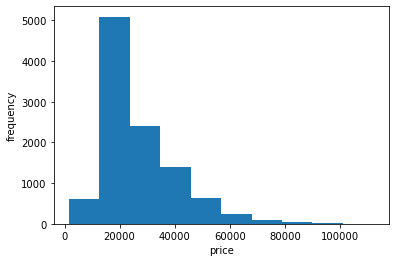

In [325]:
plt.hist(junse['보증금(만원)'])
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

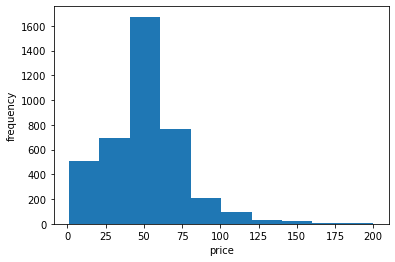

In [327]:
plt.hist(wolse['월세(만원)'])
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

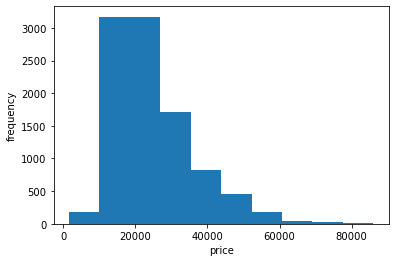

In [328]:
plt.hist(junse[junse['전용면적(㎡)'] < 85]['보증금(만원)'])
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

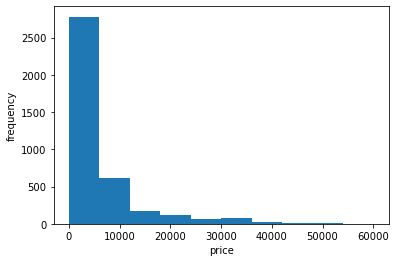

In [329]:
plt.hist(wolse[wolse['전용면적(㎡)'] < 85]['보증금(만원)'])
plt.xlabel('price')
plt.ylabel('frequency')
plt.show()

1. 가격이 저렴하다 <-> 전용면적이 작다

2. 전용 면적이 작다 <-> 역과 가깝다


### 결론: 전월세 값이 저렴할수록 역과 가깝다. 역과 가까울수록 전월세 값이 저렴하다.

*** 면적이 비슷한 경우 ***

### 결론: 역과 가까울수록 전월세 값이 비싸다